In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data = "C:\\Users\\palla\\Georgia Tech\\MG 6203\\Project\\Data\\mortgage_dataset4.csv"
df = pd.read_csv(data)
df.head()


,record_date,mortgage_rate,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity,3monthForecast,6monthForecast,12monthForecast
0,2001-01,7.0325,103.0259,175.6,41994416,91.8903,5.62,5234,4981.02,2.085,7.0775,7.1275,6.9975
1,2001-04,7.0775,102.6877,176.4,43198401,90.7293,4.53,4615,5167.06,2.059,7.1275,6.6175,6.9850
2,2001-07,7.1275,102.2020,177.4,42164052,89.2260,3.66,4447,5182.80,2.014,6.6175,6.9975,6.4850
3,2001-10,6.6175,102.4001,177.6,43746475,88.3926,2.31,3707,5316.20,1.980,6.9975,6.9850,6.1125
4,2002-01,6.9975,103.8754,177.7,44391512,88.4665,1.74,3699,5455.30,1.969,6.9850,6.4850,5.9160


In [18]:
# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Specify the columns to drop by index
columns_to_drop = [1,10, 11, 12]

# Use the drop method to remove the specified columns
X = df.drop(df.columns[columns_to_drop], axis=1)

# Display the DataFrame to verify the changes
X.head()


,record_date,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity
0,2001-01,103.0259,175.6,41994416,91.8903,5.62,5234,4981.02,2.085
1,2001-04,102.6877,176.4,43198401,90.7293,4.53,4615,5167.06,2.059
2,2001-07,102.2020,177.4,42164052,89.2260,3.66,4447,5182.80,2.014
3,2001-10,102.4001,177.6,43746475,88.3926,2.31,3707,5316.20,1.980
4,2002-01,103.8754,177.7,44391512,88.4665,1.74,3699,5455.30,1.969


In [19]:
y = df["3monthForecast"] 

In [20]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((63, 9), (27, 9))

In [21]:
X_train.corr()

,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity
consumer_goods_production,1.000000,-0.421821,-0.251755,0.081057,0.714778,-0.043737,-0.353902,0.560000
cpi,-0.421821,1.000000,0.953581,0.695030,-0.263676,0.836513,0.968680,-0.948024
household_net_worth,-0.251755,0.953581,1.000000,0.689631,-0.177716,0.938679,0.989439,-0.923396
industrial_production,0.081057,0.695030,0.689631,1.000000,0.142222,0.668836,0.630795,-0.560559
rates_3months,0.714778,-0.263676,-0.177716,0.142222,1.000000,0.022831,-0.266284,0.486500
job_openings,-0.043737,0.836513,0.938679,0.668836,0.022831,1.000000,0.914903,-0.785167
money_supply,-0.353902,0.968680,0.989439,0.630795,-0.266284,0.914903,1.000000,-0.957679
money_velocity,0.560000,-0.948024,-0.923396,-0.560559,0.486500,-0.785167,-0.957679,1.000000


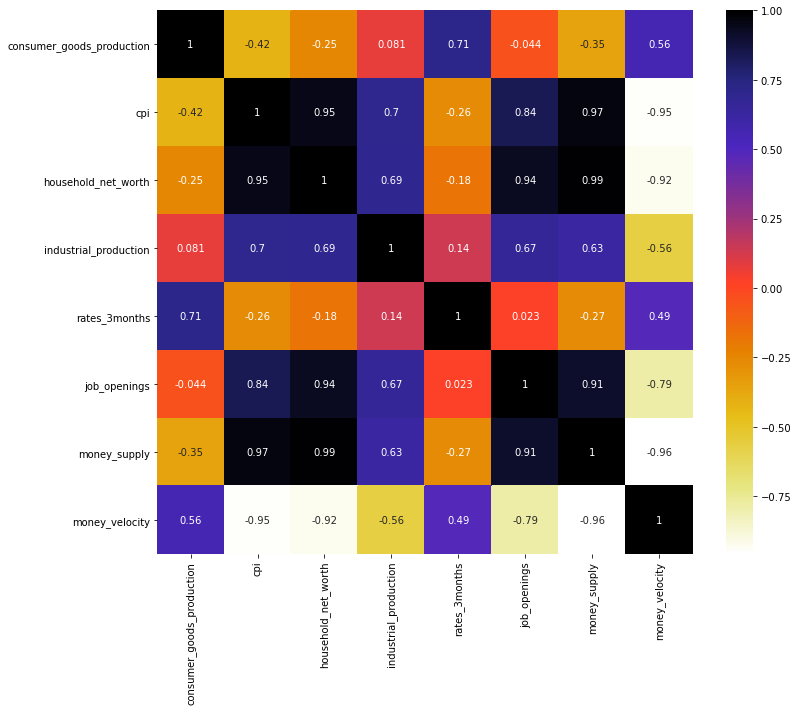

In [22]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [23]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

5

In [25]:
corr_features

{'household_net_worth',
 'job_openings',
 'money_supply',
 'money_velocity',
 'rates_3months'}

In [26]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,record_date,consumer_goods_production,cpi,industrial_production
2,2001-07,102.2020,177.40,89.2260
13,2004-04,107.1054,187.40,92.9096
53,2014-04,99.4080,236.47,101.8425
41,2011-04,98.9447,224.09,93.6525
66,2017-07,99.9050,244.24,100.0947
30,2008-07,104.9653,219.02,99.4214
45,2012-04,97.9000,229.19,97.2942
43,2011-10,99.9406,226.75,95.6924
78,2020-07,99.9082,258.28,95.0144
89,2023-04,103.6524,302.92,103.1274
